# CREDIT CARD FRAUD PREDICTION
In today's world, where most transactions happen online, credit card fraud is a concern for banks and people who use cards. As fraudsters get smarter, old-fashioned systems struggle to catch them. This project is all about using machine learning to spot credit card fraud by using a bunch of information, like CardType, Domain,Transaction amount,Average Income Expendicture, and more, to build a smart model. This model will look for signs of fraud in transactions, like unusual spending or weird patterns.


### Importing necessary libraries and classes


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pickle

### Reading the csv file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PROJECT/credit.csv')
df

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt
...,...,...,...,...,...,...,...,...,...,...,...,...
37092,1250026389,637,62.0,Female,Married,Gold,Verve,Local,534813,198167,1,Lagos
37093,1247133695,582,20.0,Male,Divorced,Gold,Verve,Local,178903,147133,0,Enugu
37094,1260545996,571,67.0,Male,Married,White,Visa,International,301594,256814,1,Abuja
37095,1267917366,528,58.0,Female,Unknown,Gold,Verve,International,212826,113439,0,Port Harcourt


### Exploratory Data Analysis

<ipython-input-5-dc4b97278b94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

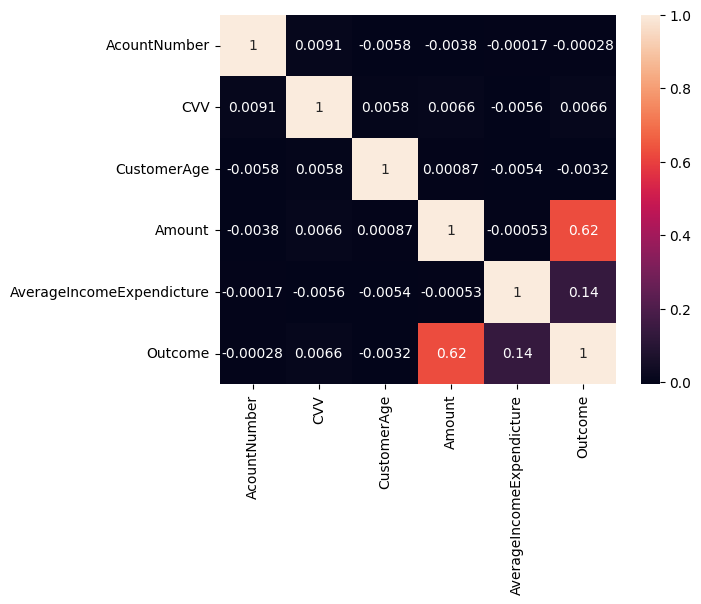

In [ ]:
sns.heatmap(df.corr(),annot=True)
# creates a heatmap of the correlation matrix of a DataFrame

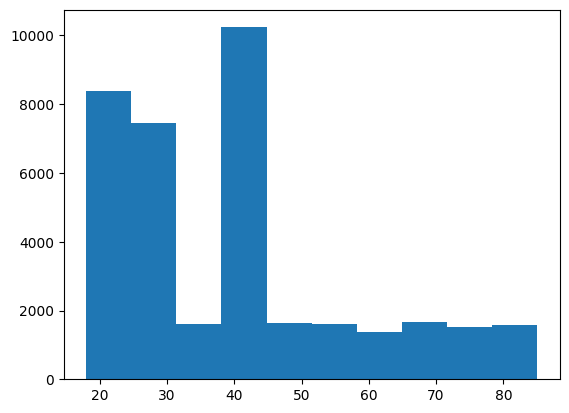

In [ ]:
plt.hist(df['CustomerAge'])
plt.show()
# histogram of the 'CustomerAge' column

<Axes: xlabel='CardType', ylabel='count'>

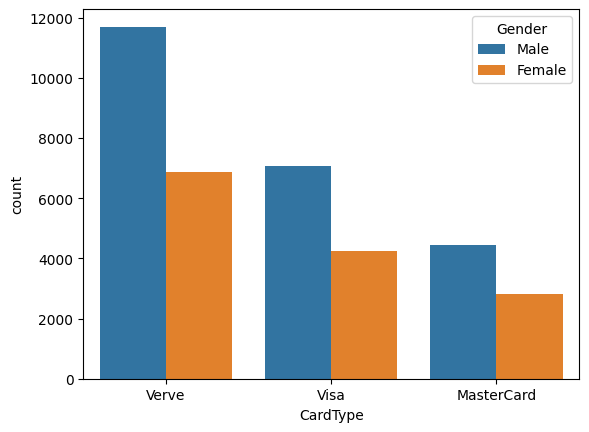

In [ ]:
sns.countplot(x='CardType',data=df,hue='Gender')
# count plot of the 'CardType' column with respect to the 'Gender' column

<Axes: xlabel='Domain', ylabel='count'>

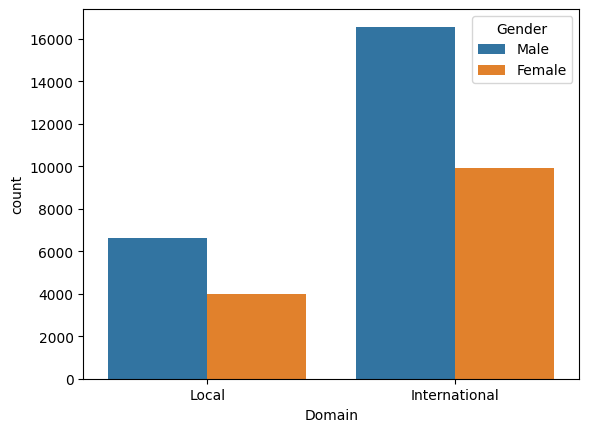

In [ ]:
sns.countplot(x='Domain',data=df,hue='Gender')
# countplot of different categories of 'Domain' with respect to colors of the cards 'CardColour'

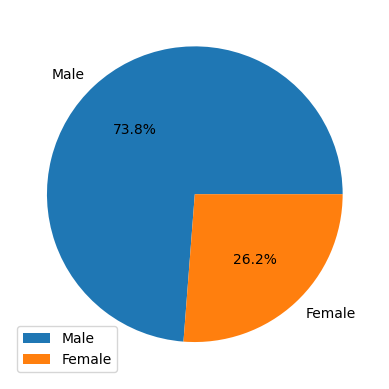

In [ ]:
Outcome=df.Outcome.value_counts()
Gender=['Male','Female']
plt.pie(Outcome,autopct='%1.1f%%',labels=Gender)
plt.legend(loc='lower left')
plt.show()

In [ ]:
df.loc[(df['CustomerAge']<=60)&(df['AverageIncomeExpendicture']>250000)]

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt
6,1258961564,426,27.0,Male,Married,Gold,Verve,Local,367905,258085,0,Other
17,1261534483,507,29.0,Male,Married,Gold,Verve,Local,491937,258868,1,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
31748,1266535781,449,55.0,Female,Single,Gold,Verve,International,614392,253314,1,Lagos
31752,1252694089,443,23.0,Male,Single,White,MasterCard,Local,963428,292567,1,Ota
37081,1261176846,506,46.0,Male,Married,White,MasterCard,International,113359,314620,0,Port Harcourt
37086,1283695998,387,48.0,Male,Single,White,MasterCard,Local,248391,267013,1,Kano


In [ ]:
df.loc[(df['Domain']=='International')&(df['Outcome']==1)]

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt
5,1243532523,310,23.0,Male,Married,White,MasterCard,International,524019,118086,1,Lagos
8,1242065386,319,22.0,Male,Single,Gold,Verve,International,773932,119074,1,Ota
9,1261095164,482,18.0,Male,Single,White,Visa,International,399983,165251,1,Abuja
...,...,...,...,...,...,...,...,...,...,...,...,...
37087,1272912252,365,57.0,Female,Unknown,White,MasterCard,International,506522,143470,1,Kano
37088,1282999035,584,59.0,Male,Single,White,MasterCard,International,256483,200554,1,Ota
37090,1277113248,641,55.0,Female,Single,Gold,Verve,International,546281,240474,1,Ota
37091,1287947663,216,53.0,Male,Married,Gold,Verve,International,406774,164675,1,Kano


### Data Preprocessing

Checking for missing values

In [ ]:
df.isna().sum()

AcountNumber                    0
CVV                             0
CustomerAge                  8851
Gender                          0
Marital Status                  0
CardColour                      0
CardType                        0
Domain                          0
Amount                          0
AverageIncomeExpendicture       0
Outcome                         0
Customer_City_Address           0
dtype: int64

filling the missing values with mean

In [ ]:
df['CustomerAge']=df['CustomerAge'].fillna(df['CustomerAge'].mean())

In [ ]:
df.isna().sum()

AcountNumber                 0
CVV                          0
CustomerAge                  0
Gender                       0
Marital Status               0
CardColour                   0
CardType                     0
Domain                       0
Amount                       0
AverageIncomeExpendicture    0
Outcome                      0
Customer_City_Address        0
dtype: int64

checking for duplicate rows

In [ ]:
df.duplicated().sum()

0

checking if all the features are numerical type

In [ ]:
df.dtypes

AcountNumber                   int64
CVV                            int64
CustomerAge                  float64
Gender                        object
Marital Status                object
CardColour                    object
CardType                      object
Domain                        object
Amount                         int64
AverageIncomeExpendicture      int64
Outcome                        int64
Customer_City_Address         object
dtype: object

Label encoding the features to convert object type to numerical values

In [ ]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['CardColour']=le.fit_transform(df['CardColour'])
df['CardType']=le.fit_transform(df['CardType'])
df['Domain']=le.fit_transform(df['Domain'])
df['Customer_City_Address']=le.fit_transform(df['Customer_City_Address'])
df

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,1,1,0,1,1,129282,170919,0,1
1,1271246193,401,25.0,1,2,0,1,0,574384,329353,1,1
2,1242290165,266,21.0,0,1,1,2,0,190766,292922,0,1
3,1245478185,402,26.0,1,3,1,2,1,130395,145444,0,2
4,1258212072,334,28.0,0,1,0,1,0,685145,295990,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
37092,1250026389,637,62.0,0,1,0,1,1,534813,198167,1,4
37093,1247133695,582,20.0,1,0,0,1,1,178903,147133,0,1
37094,1260545996,571,67.0,1,1,1,2,0,301594,256814,1,0
37095,1267917366,528,58.0,0,3,0,1,0,212826,113439,0,7


In [ ]:
df['CustomerAge']=df['CustomerAge'].astype(int)

In [ ]:
df.dtypes

AcountNumber                 int64
CVV                          int64
CustomerAge                  int64
Gender                       int64
Marital Status               int64
CardColour                   int64
CardType                     int64
Domain                       int64
Amount                       int64
AverageIncomeExpendicture    int64
Outcome                      int64
Customer_City_Address        int64
dtype: object

Splitting the dataset into features and target


In [ ]:
X=df.drop(['Outcome'],axis=1)
X

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Customer_City_Address
0,1275734409,364,28,1,1,0,1,1,129282,170919,1
1,1271246193,401,25,1,2,0,1,0,574384,329353,1
2,1242290165,266,21,0,1,1,2,0,190766,292922,1
3,1245478185,402,26,1,3,1,2,1,130395,145444,2
4,1258212072,334,28,0,1,0,1,0,685145,295990,7
...,...,...,...,...,...,...,...,...,...,...,...
37092,1250026389,637,62,0,1,0,1,1,534813,198167,4
37093,1247133695,582,20,1,0,0,1,1,178903,147133,1
37094,1260545996,571,67,1,1,1,2,0,301594,256814,0
37095,1267917366,528,58,0,3,0,1,0,212826,113439,7


In [ ]:
y=df['Outcome']
y

0        0
1        1
2        0
3        0
4        1
        ..
37092    1
37093    0
37094    1
37095    0
37096    0
Name: Outcome, Length: 37097, dtype: int64

Scaling the input features

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

Splitting the dataset into train data and test data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((25967, 11), (25967,))

In [ ]:
X_test.shape,y_test.shape

((11130, 11), (11130,))

Building models using different classification algorithm

In [ ]:
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC(kernel='linear')
nbs=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=1)
rf=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=7,random_state=1)
ad=AdaBoostClassifier()
xgb=XGBClassifier()
models=[kn,sv,nbs,dt,rf,ad,xgb]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))


KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      2911
           1       0.86      0.88      0.87      8219

    accuracy                           0.81     11130
   macro avg       0.75      0.74      0.75     11130
weighted avg       0.81      0.81      0.81     11130

SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2911
           1       0.89      0.89      0.89      8219

    accuracy                           0.84     11130
   macro avg       0.79      0.79      0.79     11130
weighted avg       0.84      0.84      0.84     11130

GaussianNB()
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      2911
           1       0.90      0.87      0.89      8219

    accuracy                           0.84     11130
   macro avg       0.79      0.80      0.79     11130
weig

### Feature selection

Calculate the correlation matrix

In [ ]:
df.corr()

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
AcountNumber,1.000000,0.009070,-0.005059,-0.002884,0.004334,-0.006518,0.009329,0.001874,-0.003800,-0.000168,-0.000283,0.003748
CVV,0.009070,1.000000,0.005089,0.002789,0.002469,0.002452,-0.000635,-0.001975,0.006554,-0.005583,0.006643,0.003710
CustomerAge,-0.005059,0.005089,1.000000,-0.004184,0.019479,-0.005522,-0.005294,-0.000734,0.000725,-0.004737,-0.002830,-0.000154
Gender,-0.002884,0.002789,-0.004184,1.000000,-0.001166,-0.011255,0.007777,0.000110,0.006979,-0.005106,0.004491,-0.002554
Marital Status,0.004334,0.002469,0.019479,-0.001166,1.000000,-0.004123,-0.004692,0.004125,0.008284,-0.003278,0.006550,-0.001027
CardColour,-0.006518,0.002452,-0.005522,-0.011255,-0.004123,1.000000,0.155536,-0.000068,0.000641,-0.002597,0.000258,-0.001826
CardType,0.009329,-0.000635,-0.005294,0.007777,-0.004692,0.155536,1.000000,0.000273,0.005456,-0.004897,0.066311,-0.001938
Domain,0.001874,-0.001975,-0.000734,0.000110,0.004125,-0.000068,0.000273,1.000000,0.004145,-0.040514,-0.041327,-0.000249
Amount,-0.003800,0.006554,0.000725,0.006979,0.008284,0.000641,0.005456,0.004145,1.000000,-0.000534,0.623363,-0.001850
AverageIncomeExpendicture,-0.000168,-0.005583,-0.004737,-0.005106,-0.003278,-0.002597,-0.004897,-0.040514,-0.000534,1.000000,0.135677,-0.006350


Dropping the irrelevant features

In [ ]:
X=X.drop(['AcountNumber','CardColour'],axis=1)
X

,CVV,CustomerAge,Gender,Marital Status,CardType,Domain,Amount,AverageIncomeExpendicture,Customer_City_Address
0,364,28,1,1,1,1,129282,170919,1
1,401,25,1,2,1,0,574384,329353,1
2,266,21,0,1,2,0,190766,292922,1
3,402,26,1,3,2,1,130395,145444,2
4,334,28,0,1,1,0,685145,295990,7
...,...,...,...,...,...,...,...,...,...
37092,637,62,0,1,1,1,534813,198167,4
37093,582,20,1,0,1,1,178903,147133,1
37094,571,67,1,1,2,0,301594,256814,0
37095,528,58,0,3,1,0,212826,113439,7


### Imbalanced data handling

Check if the dataset is imbalanced

In [ ]:
y.value_counts()

1    27370
0     9727
Name: Outcome, dtype: int64

Oversampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y_os.value_counts()

0    27370
1    27370
Name: Outcome, dtype: int64

In [ ]:
X_os

,CVV,CustomerAge,Gender,Marital Status,CardType,Domain,Amount,AverageIncomeExpendicture,Customer_City_Address
0,364,28,1,1,1,1,129282,170919,1
1,401,25,1,2,1,0,574384,329353,1
2,266,21,0,1,2,0,190766,292922,1
3,402,26,1,3,2,1,130395,145444,2
4,334,28,0,1,1,0,685145,295990,7
...,...,...,...,...,...,...,...,...,...
54735,417,35,0,1,1,0,309152,122823,5
54736,313,64,0,2,1,0,169529,311713,1
54737,336,27,0,1,1,0,191087,292621,1
54738,330,70,1,1,1,0,313891,244269,6


In [ ]:
y_os

0        0
1        1
2        0
3        0
4        1
        ..
54735    0
54736    0
54737    0
54738    0
54739    0
Name: Outcome, Length: 54740, dtype: int64

In [ ]:
scaler=MinMaxScaler()
X_os_scaled=scaler.fit_transform(X_os)
X_os_scaled

array([[0.32762313, 0.14925373, 1.        , ..., 0.03253392, 0.23637624,
        0.14285714],
       [0.40685225, 0.10447761, 1.        , ..., 0.52711753, 0.76457057,
        0.14285714],
       [0.11777302, 0.04477612, 0.        , ..., 0.10085304, 0.64311528,
        0.14285714],
       ...,
       [0.26766595, 0.13432836, 0.        , ..., 0.10120973, 0.64211179,
        0.14285714],
       [0.25481799, 0.7761194 , 1.        , ..., 0.23766574, 0.48091374,
        0.85714286],
       [0.19700214, 0.26865672, 1.        , ..., 0.16808878, 0.53539209,
        0.57142857]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os_scaled,y_os,random_state=1,test_size=0.3)

### Hyperparameter Tuning using Gridsearchcv

In [ ]:
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(kn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
params1={'kernel':['linear','poly','rbf']}
clf1=GridSearchCV(sv,params1,cv=10,scoring='accuracy')
clf1.fit(X_train,y_train)
print(clf1.best_params_)

{'kernel': 'poly'}


In [ ]:
params3={'criterion':['gini','entropy'],'splitter':['best','random']}
clf3=GridSearchCV(dt,params3,cv=10,scoring='accuracy')
clf3.fit(X_train,y_train)
print(clf3.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}


### Model Creation

KNeighbors Classifier

In [ ]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred_kn=knn1.predict(X_test)
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      8162
           1       0.92      0.80      0.86      8260

    accuracy                           0.86     16422
   macro avg       0.87      0.86      0.86     16422
weighted avg       0.87      0.86      0.86     16422



Support Vector Classifier

In [ ]:
sv1=SVC(kernel='poly')
sv1.fit(X_train,y_train)
y_pred_sv=sv1.predict(X_test)
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8162
           1       0.95      0.81      0.87      8260

    accuracy                           0.88     16422
   macro avg       0.89      0.88      0.88     16422
weighted avg       0.89      0.88      0.88     16422



Naive Bayes

In [ ]:
nbs1=GaussianNB()
nbs1.fit(X_train,y_train)
y_pred_nbs=nbs1.predict(X_test)
print(classification_report(y_test,y_pred_nbs))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8162
           1       0.89      0.81      0.85      8260

    accuracy                           0.86     16422
   macro avg       0.86      0.86      0.86     16422
weighted avg       0.86      0.86      0.86     16422



Decision Tree Classifier

In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=15,random_state=1,splitter='best')
dt1.fit(X_train,y_train)
y_pred_dt=dt1.predict(X_test)
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8162
           1       0.94      0.85      0.89      8260

    accuracy                           0.90     16422
   macro avg       0.90      0.90      0.90     16422
weighted avg       0.90      0.90      0.90     16422



Random Forest Classifier

In [ ]:
rf1=RandomForestClassifier(n_estimators=650,criterion='entropy',max_depth=15,random_state=5)
rf1.fit(X_train,y_train)
y_pred_rf=rf1.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      8162
           1       0.99      0.82      0.90      8260

    accuracy                           0.91     16422
   macro avg       0.92      0.91      0.90     16422
weighted avg       0.92      0.91      0.90     16422



AdaBoost Classifier

In [ ]:
ad1=AdaBoostClassifier()
ad1.fit(X_train,y_train)
y_pred_ad=ad1.predict(X_test)
print(classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8162
           1       0.92      0.85      0.88      8260

    accuracy                           0.89     16422
   macro avg       0.89      0.89      0.89     16422
weighted avg       0.89      0.89      0.89     16422



XGBoost Classifier

In [ ]:
xgb1=XGBClassifier(n_estimators=450)
xgb1.fit(X_train,y_train)
y_pred_xgb=xgb1.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8162
           1       0.94      0.86      0.90      8260

    accuracy                           0.90     16422
   macro avg       0.90      0.90      0.90     16422
weighted avg       0.90      0.90      0.90     16422



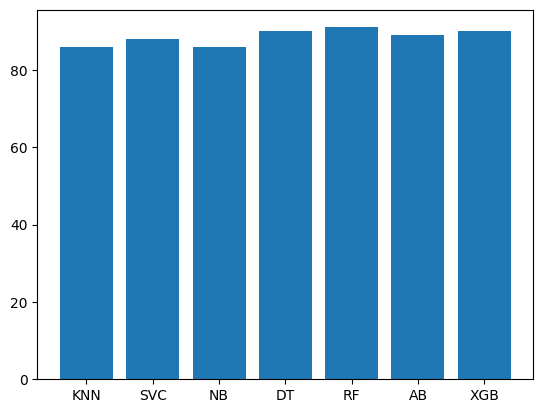

In [ ]:
x=['KNN','SVC','NB','DT','RF','AB','XGB']
y=[86,88,86,90,91,89,90]
plt.bar(x,y)
plt.show()

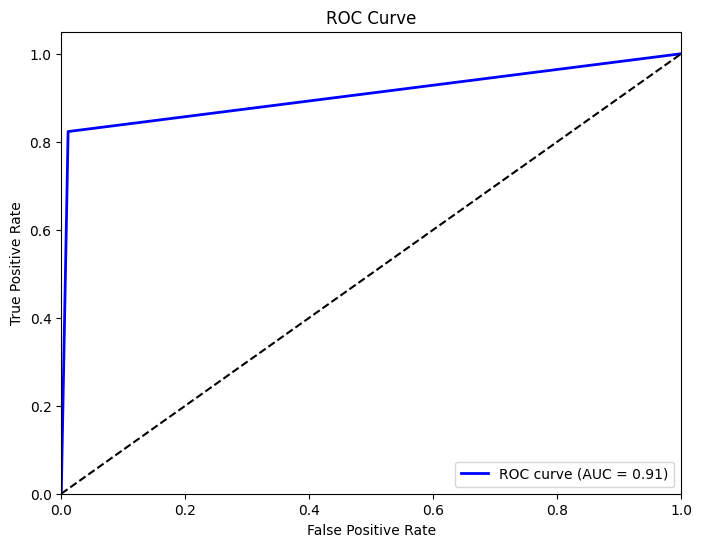

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_rf1,tpr_rf1,thresholds=roc_curve(y_test,y_pred_rf)
roc_auc=auc(fpr_rf1,tpr_rf1)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf1,tpr_rf1,color='blue',lw=2,label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Saving the scaler object and model with high accuracy



In [ ]:
pickle.dump(rf1,open('model3.sav','wb'))

In [ ]:
pickle.dump(scaler,open('scaler3.sav','wb'))